In [50]:
import os
import numpy as np
import pandas as pd

from patsy import dmatrix
from utils import process_yield_data
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from inference_utils import (
    prepare_dataset,
    load_evi_data_and_prepare_features
)

In [51]:
YIELD_DATA_PATH = Path("./combined_yield_data.csv")
yield_data_weekly = process_yield_data(YIELD_DATA_PATH)

            Volume (Pounds)  Cumulative Volumne (Pounds)  Pounds/Acre
Date                                                                 
2012-01-02          23400.0                      23400.0          2.0
2012-01-03          26064.0                      49464.0          3.0
2012-01-04          32382.0                      81846.0          3.0
2012-01-05          69804.0                     151650.0          7.0
2012-01-06          18000.0                     169650.0          2.0

Number of Yield Data Points:  3970

Column Names: Index(['Volume (Pounds)', 'Cumulative Volumne (Pounds)', 'Pounds/Acre'], dtype='object')
Number of Yield Data Points: 2879
Yield data with time features:
            Volume (Pounds)  Cumulative Volumne (Pounds)  Pounds/Acre  \
Date                                                                    
2012-03-04         525753.0                    1785843.0    18.333333   
2012-03-11        2949534.0                    4735377.0    51.666667   
2012-03-18   

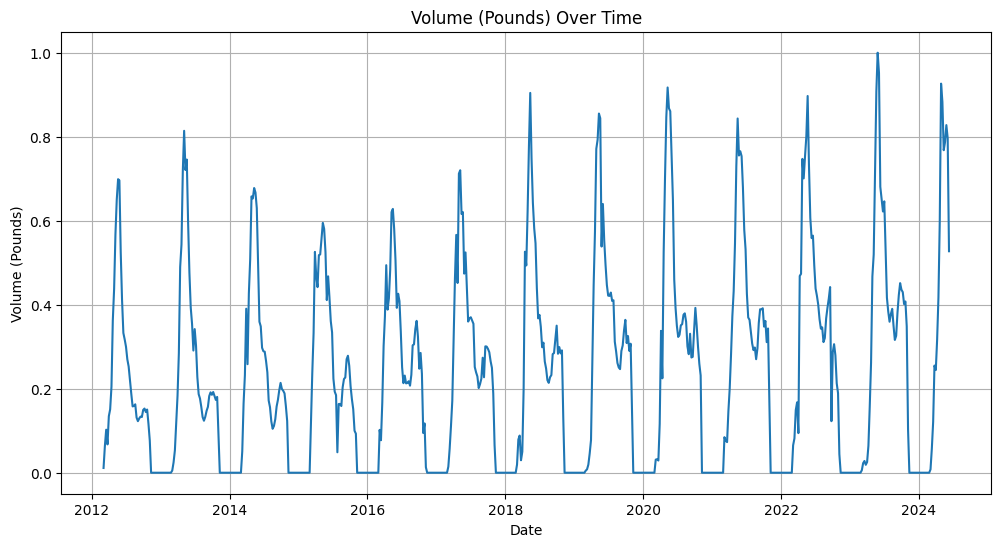

In [52]:
# Volume (Pounds) over time
plt.figure(figsize=(12, 6))
plt.plot(yield_data_weekly.index, yield_data_weekly['Volume (Pounds)'], label='Volume (Pounds)')
plt.title('Volume (Pounds) Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Pounds)')
plt.grid(True)
plt.show()

In [53]:
# Import EVI data
evi_data_dir = "./landsat_evi_monterey_masked"

train_loader, val_loader, mean, std, dataset = prepare_dataset(
    evi_data_dir, yield_data_weekly, target_shape=(512, 512), augment=False, full=True
)

Processed file 1/84 in 0.06s
Processed file 2/84 in 0.06s
Processed file 3/84 in 0.06s
Processed file 4/84 in 0.06s
Processed file 5/84 in 0.06s
Processed file 6/84 in 0.07s
Processed file 7/84 in 0.06s
Processed file 8/84 in 0.05s
Processed file 9/84 in 0.06s
Processed file 10/84 in 0.06s
Processed file 11/84 in 0.06s
Processed file 12/84 in 0.06s
Processed file 13/84 in 0.07s
Processed file 14/84 in 0.06s
Processed file 15/84 in 0.06s
Processed file 16/84 in 0.06s
Processed file 17/84 in 0.07s
Processed file 19/84 in 0.06s
Processed file 20/84 in 0.06s
Processed file 21/84 in 0.07s
Processed file 22/84 in 0.07s
Processed file 23/84 in 0.06s
Processed file 24/84 in 0.05s
Processed file 25/84 in 0.06s
Processed file 26/84 in 0.06s
Processed file 27/84 in 0.06s
Processed file 28/84 in 0.06s
Processed file 29/84 in 0.06s
Processed file 30/84 in 0.08s
Processed file 31/84 in 0.12s
Processed file 32/84 in 0.15s
Processed file 33/84 in 0.13s
Processed file 34/84 in 0.12s
Processed file 35/8

Correlation Matrix:
            EVI     Yield
EVI    1.000000  0.129803
Yield  0.129803  1.000000


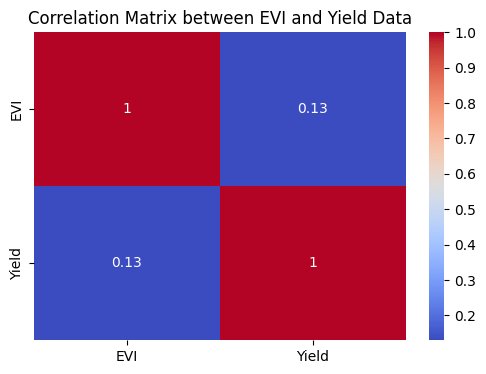

In [54]:
# Initialize
evi_data = []
yield_data = []
dates = []

for i in range(len(dataset)):
    evi_sequence, yield_val, time_features, date = dataset[i]
    evi_data.append(evi_sequence.mean().item())  # Average EVI
    yield_data.append(yield_val.item())  # Pull corresponding yield value
    dates.append(pd.to_datetime(date, unit='s'))

# Convert lists to np arrays
evi_data = np.array(evi_data)
yield_data = np.array(yield_data)
dates = np.array(dates)

# Create DataFrame
eda_df = pd.DataFrame({
    'Date': dates,
    'EVI': evi_data,
    'Yield': yield_data,
})

# Calculate correlation matrix
correlation_matrix = eda_df[['EVI', 'Yield']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between EVI and Yield Data')
plt.show()

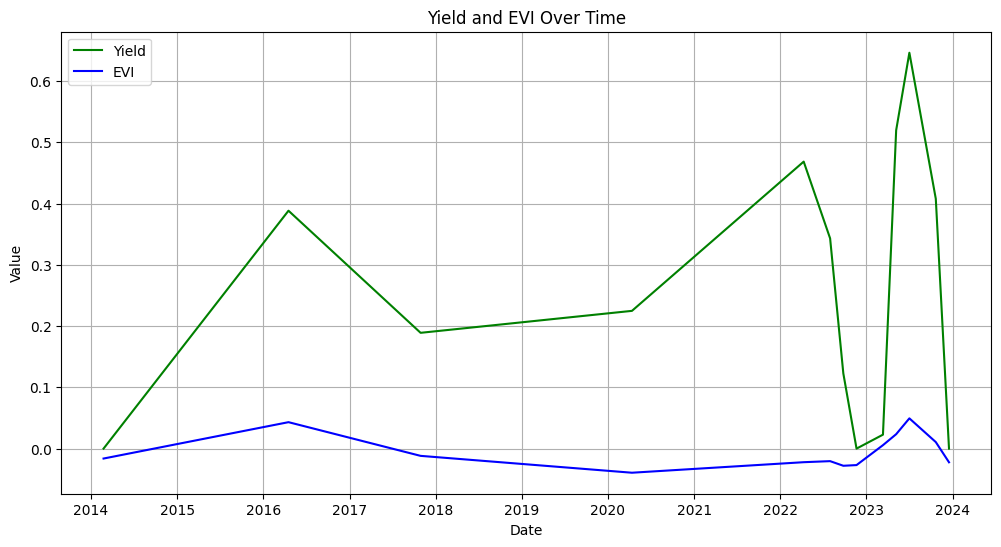

In [56]:
# Time series plots to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(eda_df.index, eda_df['Volume (Pounds)'], label='Yield', color='green')
plt.plot(eda_df.index, eda_df['EVI'], label='EVI', color='blue')
plt.title('Yield and EVI Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

            Volume (Pounds)  Cumulative Volumne (Pounds)  Pounds/Acre
Date                                                                 
2012-01-02          23400.0                      23400.0          2.0
2012-01-03          26064.0                      49464.0          3.0
2012-01-04          32382.0                      81846.0          3.0
2012-01-05          69804.0                     151650.0          7.0
2012-01-06          18000.0                     169650.0          2.0

Number of Yield Data Points:  3970

Column Names: Index(['Volume (Pounds)', 'Cumulative Volumne (Pounds)', 'Pounds/Acre'], dtype='object')
Number of Yield Data Points: 2879
Yield data with time features:
            Volume (Pounds)  Cumulative Volumne (Pounds)  Pounds/Acre  \
Date                                                                    
2012-03-04         525753.0                    1785843.0    18.333333   
2012-03-11        2949534.0                    4735377.0    51.666667   
2012-03-18   

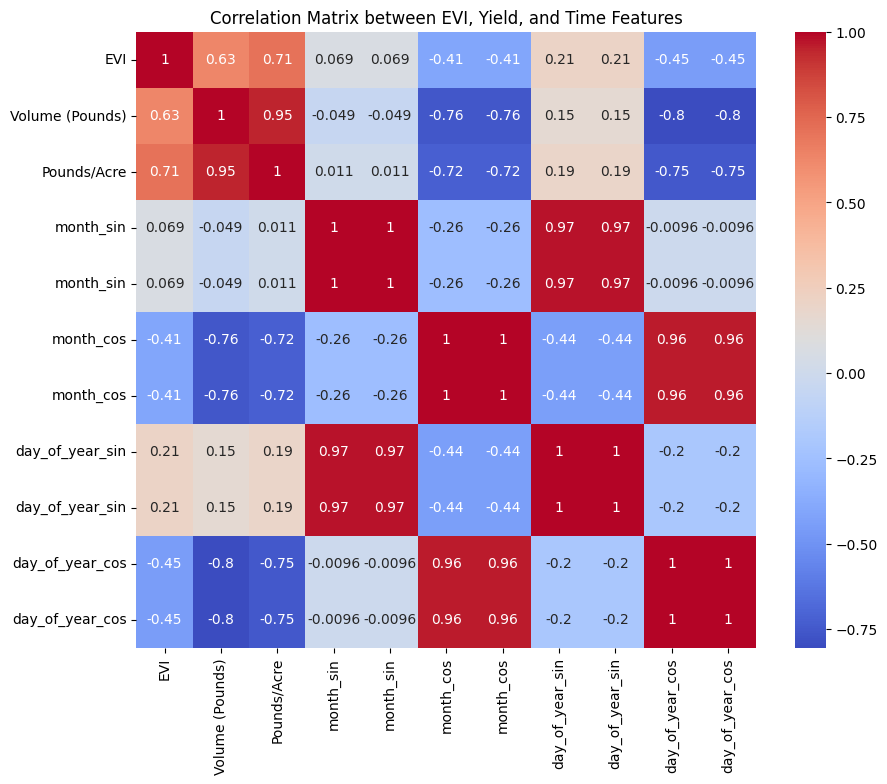

In [55]:
# Load the yield data
yield_data_weekly = process_yield_data(YIELD_DATA_PATH)

# Get the dates (time index) from the yield data
time_index = yield_data_weekly.index

# Load EVI data, create time features, and preprocess the EVI data
evi_data_preprocessed_dict, time_features_list, mean, std = load_evi_data_and_prepare_features(
    evi_data_dir, time_index, target_shape=(512, 512)
)

# Convert the time features list into a DataFrame
time_features_df = pd.DataFrame(time_features_list, columns=['month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos'], index=time_index)

# Compute the mean EVI for each date
mean_evi_values = {date: evi.mean() for date, evi in evi_data_preprocessed_dict.items()}
mean_evi_df = pd.DataFrame(list(mean_evi_values.items()), columns=['Date', 'EVI'])
mean_evi_df.set_index('Date', inplace=True)

# Merge the time features, mean EVI, and yield data into a single DataFrame
eda_df = pd.concat([mean_evi_df, yield_data_weekly, time_features_df], axis=1).dropna()

# Display the first few rows of the combined DataFrame
print(eda_df.head())

# Calculate the correlation matrix including time features
correlation_matrix_time = eda_df[['EVI', 'Volume (Pounds)', 'Pounds/Acre', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos']].corr()

# Display the correlation matrix
print("Correlation Matrix including Time Features:")
print(correlation_matrix_time)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_time, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between EVI, Yield, and Time Features')
plt.show()